In [1]:
import pandas as pd

data = pd.read_excel("ფეისბუქის პოსტების მონაცემები.xlsx")
print(data.head())

                         Page Name              User Name      Facebook Id  \
0  ქართული ოცნება / Georgian Dream  GeorgianDreamOfficial  100044424219889   
1  ქართული ოცნება / Georgian Dream  GeorgianDreamOfficial  100044424219889   
2  ქართული ოცნება / Georgian Dream  GeorgianDreamOfficial  100044424219889   
3  ქართული ოცნება / Georgian Dream  GeorgianDreamOfficial  100044424219889   
4  ქართული ოცნება / Georgian Dream  GeorgianDreamOfficial  100044424219889   

                                    Page Description        Page Created  \
0  პარტია „ქართული ოცნება - დემოკრატიული საქართველო" 2011-10-11 22:15:42   
1  პარტია „ქართული ოცნება - დემოკრატიული საქართველო" 2011-10-11 22:15:42   
2  პარტია „ქართული ოცნება - დემოკრატიული საქართველო" 2011-10-11 22:15:42   
3  პარტია „ქართული ოცნება - დემოკრატიული საქართველო" 2011-10-11 22:15:42   
4  პარტია „ქართული ოცნება - დემოკრატიული საქართველო" 2011-10-11 22:15:42   

   Likes at Posting  Followers at Posting             Post Created  \
0   

In [2]:
#შევაჯამეთ თითოეულ პოსტზე ისეთი რეაქციები, რომლებიც არ არის ირონიულად გაკეთებული
data['Loyal Reactions'] = data['Likes'] + data['Love'] + data['Care'] + data['Wow']

# პოსტებზე რეაქციების რაოდენობა ჯამურად, ფეიჯების მიხედვით
likes_count = data.groupby('Page Name')['Loyal Reactions'].sum().reset_index()

# დავსორტავთ პოსტებზე რეაქციებს კლებადობის მიხედვით
likes_count = likes_count.sort_values(by='Loyal Reactions', ascending=False)


# თითო პოსტზე რეაქციების საშუალო რაოდენობა ფეიჯების მიხედვით
likes_avg = ( data.groupby('Page Name')['Loyal Reactions'].sum()) / (data.groupby('Page Name')['Likes'].count())

#დავსორტავთ კლებადობის მიხედვით
likes_avg = likes_avg.sort_values(ascending=False).reset_index()
likes_avg.columns = ['Page Name', 'Average Likes per Post']

print(likes_count)
print("\n")
print(likes_avg)

                                            Page Name  Loyal Reactions
21                    ქართული ოცნება / Georgian Dream           248915
6   ერთიანი ნაციონალური მოძრაობა • United National...            25244
2                                      გირჩი • Girchi            11162
17                      საქართველოსთვის / For Georgia             6978
9                თავისუფალი საქართველო - Free Georgia             6898
10            ლელო საქართველოსთვის • Lelo For Georgia             4251
22                შეცვალე საქართველო • Change Georgia             2934
5              ევროპული საქართველო • European Georgia             2466
20   სტრატეგია აღმაშენებელი • Strategy Aghmashenebeli             1944
1   გია გაჩეჩილაძე "მწვანეთა პარტია"/George Gachec...              227
0                             7- მოქალაქეები/Citizens              135
3   დავით თარხან-მოურავი, ირმა ინაშვილი, საქართველ...              128
14               რესპუბლიკური პარტია Republican Party               81
12    

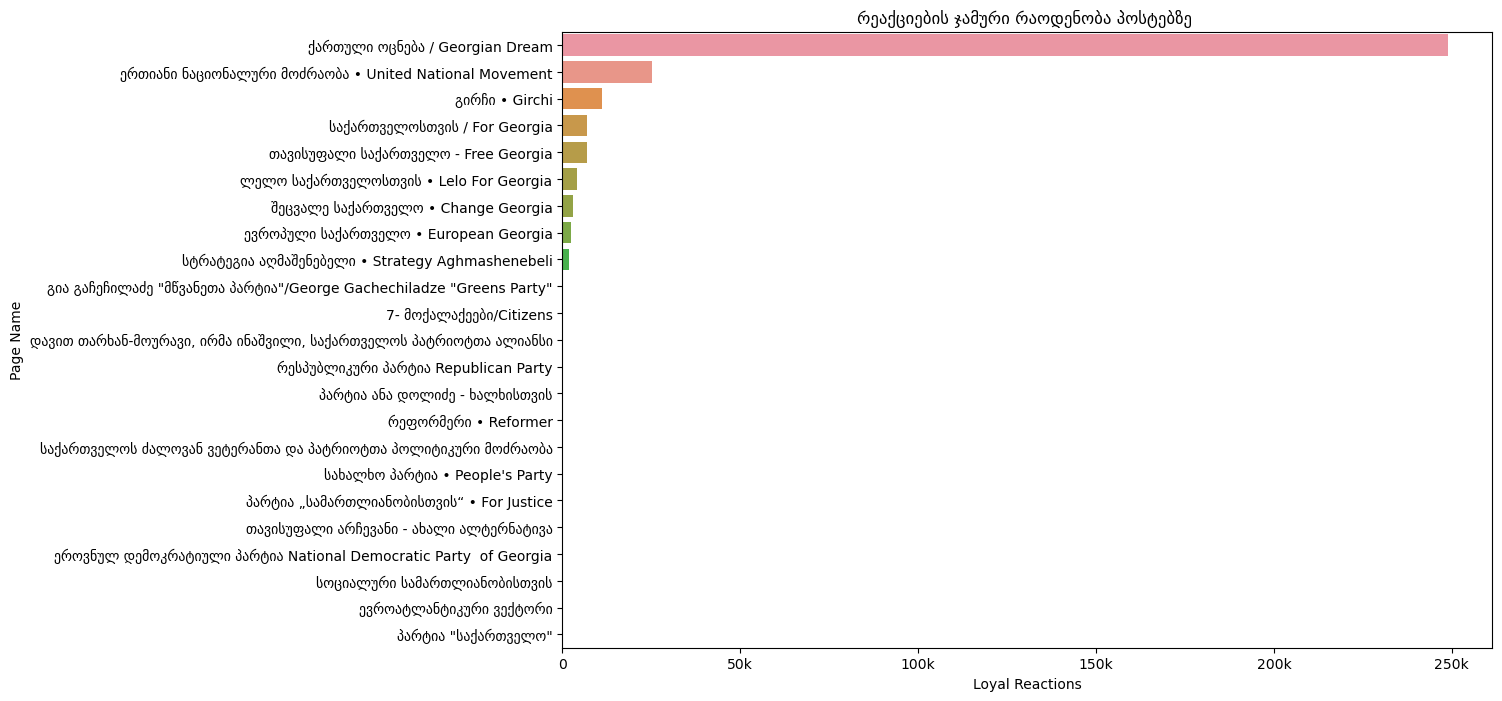

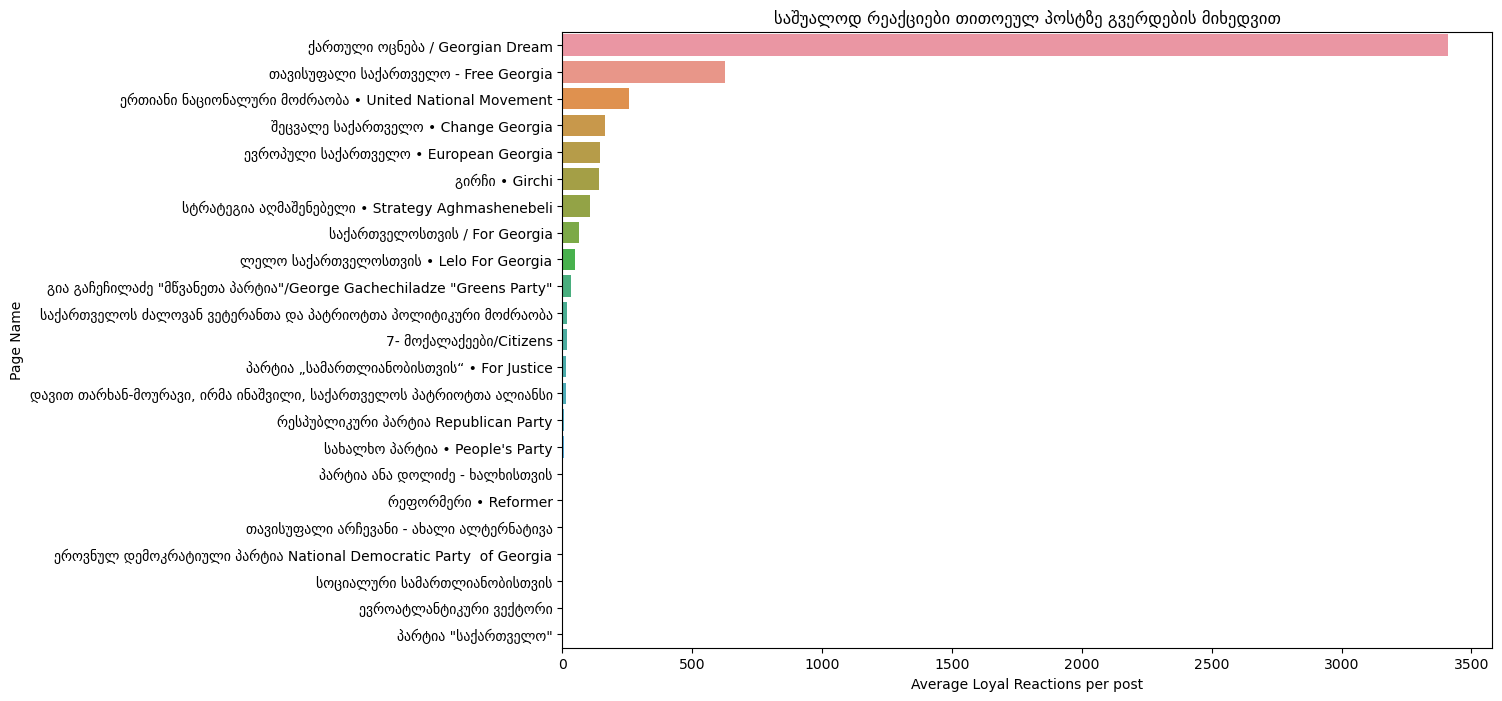

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#ვიზუალიზაცია პოსტებზე რეაქციების რაოდენობის ჯამურად, გვერდების მიხედვით
plt.figure(figsize=(12, 8))

sns.barplot(data=likes_count, x="Loyal Reactions", y="Page Name",orient='h')

plt.xticks([0, 50000, 100000, 150000, 200000, 250000], ['0', '50k', '100k', '150k', '200k', '250k'])
plt.title('რეაქციების ჯამური რაოდენობა პოსტებზე ')
plt.show()


# ვიზუალიზაცია თითოეულ პოსტზე საშუალოდ რეაქციების რაოდენობა, გვერდების მიხედვით
plt.figure(figsize=(12, 8))

barplot = sns.barplot(data=likes_avg, x="Average Likes per Post", y="Page Name", orient='h')

plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500], ['0', '500', '1000', '1500', '2000', '2500', '3000', '3500'])

plt.xlabel('Average Loyal Reactions per post')
plt.title('საშუალოდ რეაქციები თითოეულ პოსტზე გვერდების მიხედვით')
plt.show()

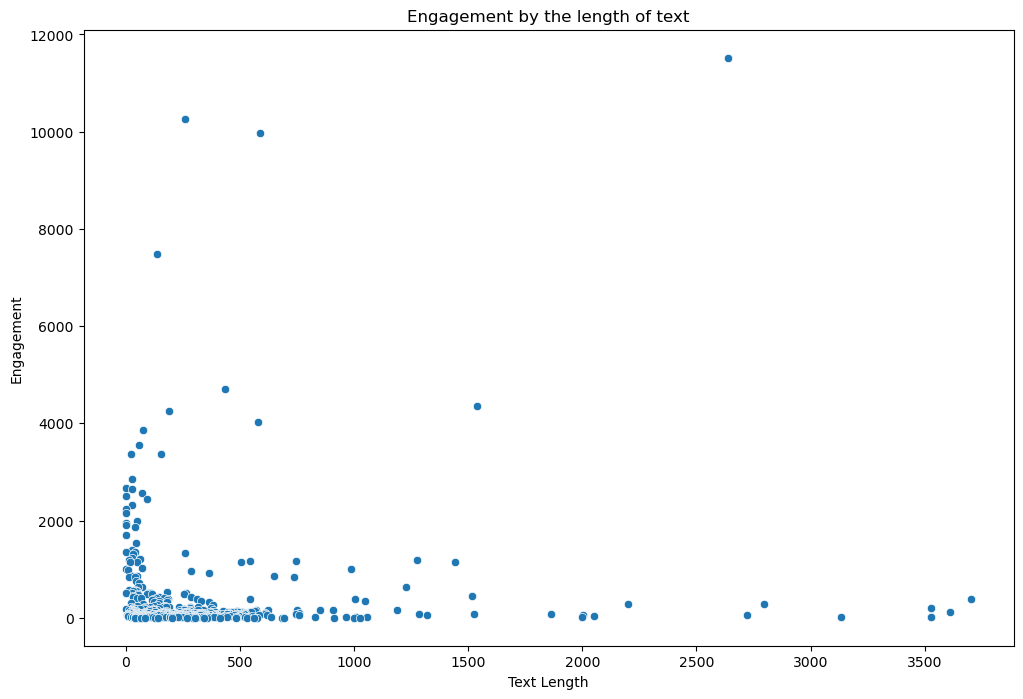

In [4]:
#ვიზუალიზაცია, თუ როგორ მოქმედებს ტექსტის სიგრძე ენგეიჯმენთზე
data['Message Length'] = data['Message'].str.len()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Message Length', y='Total Interactions')
plt.title('Engagement by the length of text')
plt.xlabel('Text Length')
plt.ylabel('Engagement')
plt.show()



In [7]:
'''
სენტიმენტ ანალიზისთვის არსებობს ბიბლიოთეკები, რომლითაც კოდი წაიკითხავს და გააანალიზებს ტექსტს, მაგრამ
ინგლისურ ენაზე მუშაობს ის, ამიტომაც გამოვიყენე Translate API(ძველ პროექტში მქონდა გამოყენებული), და data['Message']-დან ქართული ტექსტები
თარგმნა ინგლისურ ენაზე კოდმა და გააკეთა სენტიმენტ ანალიზი. (ვიზუალიზაცია იხილეთ ქვემოთ)
'''
import concurrent.futures
import requests
import re
import os
import html
import urllib.parse

class GoogleTranslateRequest:
    def __init__(self, source_language='ka', target_language='en', timeout=5):
        self.source_language = source_language
        self.target_language = target_language
        self.timeout = timeout
        self.pattern = r'(?s)class="(?:t0|result-container)">(.*?)<'

    def make_request(self, target_language, source_language, text, timeout):
        try:
            escaped_text = urllib.parse.quote(text.encode('utf8'))
            url = f'https://translate.google.com/m?tl={target_language}&sl={source_language}&q={escaped_text}'
            response = requests.get(url, timeout=timeout)
            result = re.findall(self.pattern, response.text)
            if not result:
                raise ValueError("No translation found in response.")
            return html.unescape(result[0])
        except Exception as e:
            error_message = f'Error: Translation failed for text: "{text[:30]}..."\n{e}\nResponse: {response.text}'
            print(error_message)
            with open('error.txt', 'w', encoding='utf-8') as f:
                f.write(error_message)
            return None

    def translate(self, text, target_language='en', source_language='ka', timeout=5):
        if not target_language:
            target_language = self.target_language
        if not source_language:
            source_language = self.source_language
        if not timeout:
            timeout = self.timeout
        if len(text) > 5000:
            print(f'\nError: It can only detect 5000 characters at once. ({len(text)} characters found.)')
            return None
        return self.make_request(target_language, source_language, text, timeout)


In [8]:
#სენტიმენტ ანალიზის დროს გამოიყენება textblob ბიბლიოთეკა პითონში
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity


Skipping text due to length: 'ეს ერთი თვეა, საქართველოში მოვლენები ჩვეულ რიტმში ვითარდება და განსაკუთრებული არაფერი ხდება, გარდა ე...'
Skipping text due to length: '🔵 „ქართული ოცნების“ ცენტრალურ ოფისში საპარლამენტო უმრავლესობის სხდომა გაიმართა 🔹შეხვედრაზე საპარლამე...'
Skipping text due to length: '🔵 ოზურგეთში, დაბა ლაითურში გაიხსნა და ფუნქციონირებს ახალი, უმაღლესი ევროპული სტანდარტების პენიტენციუ...'
Skipping text due to length: '🔵 ქვეშეთი-კობის ახალი გზის პროექტების ფარგლებში უკვე დასრულდა საქართველოში ყველაზე გრძელი, 9-კილომეტ...'
Skipping text due to length: '🔵 რიკოთის მაგისტრალური გზის მშენებლობის პროექტის ფარგლებში, შორაპანი-არგვეთას მონაკვეთზე ავტოტრანსპო...'
Skipping text due to length: 'საუკუნეთა განმავლობაში ადამიანები ქონების დაგროვებისკენ ისწრაფვიან. ზოგი ოქროს აგროვებს, ზოგი - ქაღა...'
Skipping text due to length: '"კანონპროექტს რომ წაიკითხავს პატიმარი, ხვდება, რომ ამ კანონის მიხედვით შეიძლება მას გათავისუფლება შე...'
Skipping text due to length: 'ევროპული საქართველოს განც

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


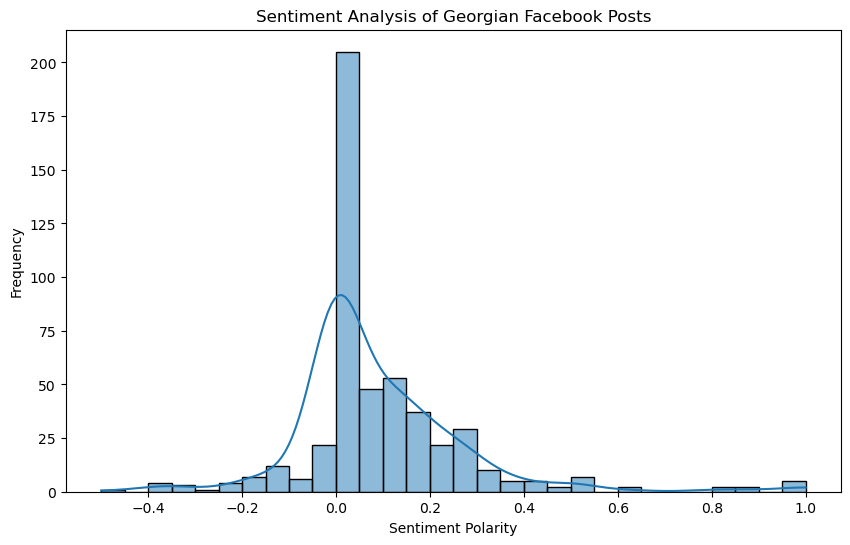

In [26]:
#სენტიმენტ ანალიზის კოდი

translator = GoogleTranslateRequest()
data = pd.read_excel("ფეისბუქის პოსტების მონაცემები.xlsx")

def get_sentiment(text):
    
    if pd.isna(text) or not text.strip():
        return None
    #ტექსტის character-ბის რაოდენობა 1000ზე ნაკლები მივუთითე, რადგან საჩვენებლად უფრო მალე წაეკითხა მონაცემები 
    if len(text) > 1000:  
        print(f"Skipping text due to length: '{text[:100]}...'")  
        return None
    try:
        translated_text = translator.translate(text)
        analysis = TextBlob(translated_text)
        return analysis.sentiment.polarity
    except Exception as e:
        print(f"Error: Translation failed for text: '{text[:100]}...'\n{e}") 
        return None


data['Sentiment'] = data['Message'].apply(get_sentiment)
data = data.dropna(subset=['Sentiment'])

# ვიზუალიზაცია
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment'], bins=30, kde=True)
plt.title('Sentiment Analysis of Georgian Facebook Posts')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


'''
X-ღერძი: Sentiment polarity მერყეობს -1-დან 1-მდე, სადაც:
-1: უარყოფითი განწყობა
0: ნეიტრალური განწყობა
1: პოზიტიური განწყობა
Y-ღერძი: პოსტების რაოდენობა თითოეული სენტიმენტისთვის -1 დან 1მდე
'''